# K - Nearest Neighbours

### Notebook imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from scipy.stats import zscore

### Constants

In [2]:
file_path = r'wisc_bc_data.csv'

### Reading the .csv file

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.shape

(569, 32)

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [6]:
# df.isnull().any()
# df.isnull().sum()

In [7]:
df.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [8]:
df['diagnosis'] = df['diagnosis'].astype('category')

In [9]:
df.dtypes

id                      int64
diagnosis            category
radius_mean           float64
texture_mean          float64
perimeter_mean        float64
area_mean             float64
smoothness_mean       float64
compactness_mean      float64
concavity_mean        float64
points_mean           float64
symmetry_mean         float64
dimension_mean        float64
radius_se             float64
texture_se            float64
perimeter_se          float64
area_se               float64
smoothness_se         float64
compactness_se        float64
concavity_se          float64
points_se             float64
symmetry_se           float64
dimension_se          float64
radius_worst          float64
texture_worst         float64
perimeter_worst       float64
area_worst            float64
smoothness_worst      float64
compactness_worst     float64
concavity_worst       float64
points_worst          float64
symmetry_worst        float64
dimension_worst       float64
dtype: object

In [10]:
# id - int
# diagnosis - category
# rest all features - float

In [11]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### Exploring the target variable

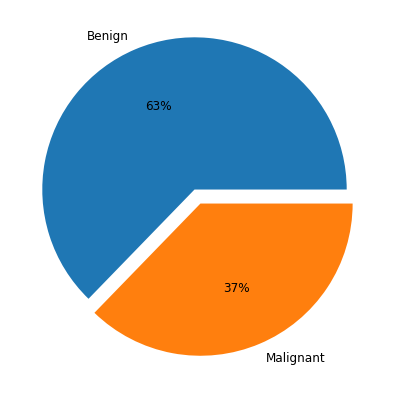

In [12]:
plt.figure(figsize= (7, 7))
plt.pie(x= df.diagnosis.value_counts(), labels=['Benign', 'Malignant'], autopct= '%.0f%%', explode= [0.05, 0.05], textprops= dict(fontsize = 12))
plt.show()

### Dropping unwanted columns

In [13]:
df.drop('id', inplace= True, axis= 1)

### Splitting the dataset

In [14]:
x = df.iloc[:,1:]
y = df.iloc[:, 0]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 1)

### Normalizing the data

In [16]:
x_train_scaled = x_train.apply(zscore)
x_test_scaled = x_test.apply(zscore)

In [17]:
# x_test_scaled
# x_train_scaled

### Fitting the dataset

In [18]:
KNN = KNeighborsClassifier(n_neighbors= 5, weights= 'distance')

In [19]:
KNN.fit(x_train_scaled, y_train)

KNeighborsClassifier(weights='distance')

In [20]:
y_pred = KNN.predict(x_test_scaled)

In [21]:
# y_pred

In [22]:
KNN.score(x_train_scaled, y_train)

1.0

In [23]:
KNN.score(x_test_scaled, y_test)

0.9590643274853801

### Creating a confusion matrix

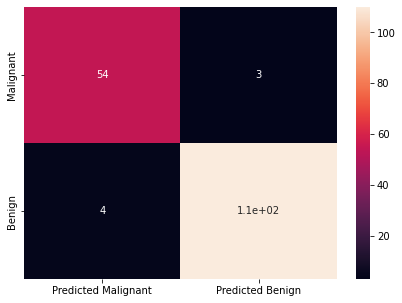

In [24]:
con_mat = metrics.confusion_matrix(y_test, y_pred, labels=['M','B'])

con_mat_df = pd.DataFrame(con_mat, index= ['Malignant','Benign'], columns= ['Predicted Malignant','Predicted Benign'])

plt.figure(figsize= (7,5))
sns.heatmap(con_mat_df, annot= True)
plt.show()

### Choosing K (n_neighbours)

In [25]:
score_1 = []
for i in range(1, 50):
    KNN_2 = KNeighborsClassifier(n_neighbors= i, weights= 'distance')
    scores_2 = cross_val_score(KNN_2, x_train_scaled, y_train, cv= 10)
    score_1.append(scores_2.mean())

### Plotting Accuracy rate vs K-values

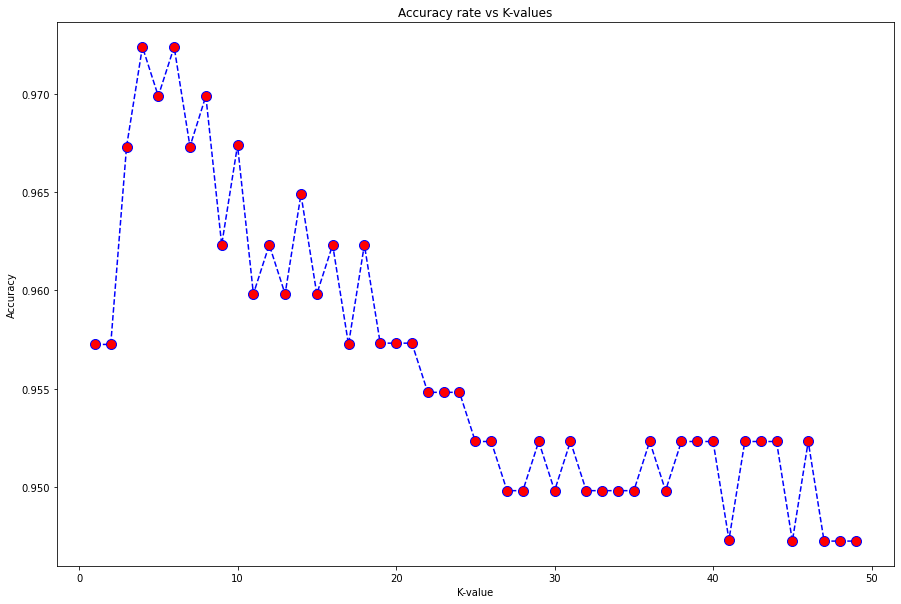

In [26]:
plt.figure(figsize=(15,10))
plt.plot(range(1, 50), score_1, color= 'blue', linestyle= 'dashed', marker= 'o', markerfacecolor= 'red', markersize= 10)
plt.title('Accuracy rate vs K-values')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.show()

In [27]:
print(f'Accuracy is highest when value of K (n_neighbours) is {score_1.index(max(score_1))+1}')

Accuracy is highest when value of K (n_neighbours) is 4


### Optimised model

In [28]:
KNN_opt = KNeighborsClassifier(n_neighbors= 4, weights= 'distance')

In [29]:
KNN_opt.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [30]:
y_pred_optimised = KNN_opt.predict(x_test_scaled)

In [31]:
KNN_opt.score(x_train_scaled, y_train)

1.0

In [32]:
KNN_opt.score(x_test_scaled, y_test)

0.9649122807017544

### Confusion matrix for KNN_opt

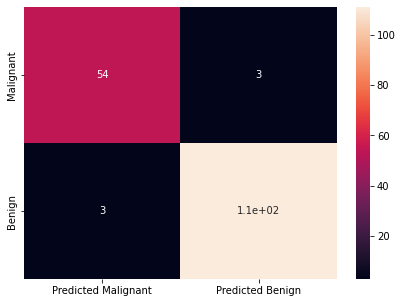

In [33]:
con_mat_opt = metrics.confusion_matrix(y_test, y_pred_optimised, labels=['M', 'B'])
con_mat_opt_df = pd.DataFrame(con_mat_opt, index= ['Malignant', 'Benign'], columns= ['Predicted Malignant', 'Predicted Benign'])

plt.figure(figsize= (7,5))
sns.heatmap(con_mat_opt_df, annot= True)
plt.show()